<a href="https://colab.research.google.com/github/martinmedice/ProjetoGit/blob/main/Aplica%C3%A7%C3%A3o_Regress%C3%A3o_N%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regressão Não-Linear

O RH da sua empresa soube que você está estudando ciência de dados e tem alguns dados de anos de experiência e salário na empresa. Eles precisam que você crie um modelo matemático pra facilitar o trabalho deles para na que hora da admissão, eles tenham uma estimativa justa de salário para o contratado conforme a experiência dele.

Aqui você vai precisar escolher qual é o melhor polinômio para ajustar os dados sem ter o perigo que criar um modelo muito complexo. Você deve:
- plotar os dados
- fazer a regressão com polinomios de até **4º grau** com split 70/30 de dados
- Comparar resíduos, R² e RMSE.

Qual o melhor modelo que você pode fornecer?

In [1]:
# aqui vai as bibliotecas que você vai usar
from yellowbrick.regressor import ResidualsPlot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## 1) Importação dos dados

O dataset já está aqui carregado e você só vai precisar usar as variáveis X (_Anos de experiência_) e y (_Salário_).

In [2]:
url = "https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv"
df = pd.read_csv(url)
X=df['Level'].values.reshape(-1,1) #anos de experiencia
y=df['Salary'].values.reshape(-1,1) #salário

## 2) Análise gráfica

Aqui você pode plotar anos de experiência por salário em um gráfico de pontos.


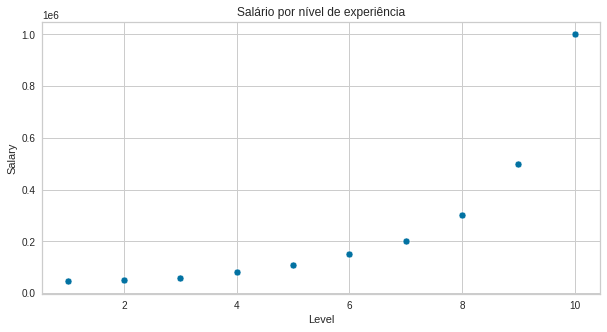

In [8]:
plt.figure(figsize=[10,5])

sns.scatterplot(data=df, x=df['Level'], y=df['Salary'])
plt.title('Salário por nível de experiência')

plt.show()

## 3) Treinamento dos modelos

### 3.1) Regressão linear

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#### 3.1.1) Treinamento do modelo

In [13]:
reg_lin= LinearRegression().fit(X_train, y_train)
ypred_teste= reg_lin.predict(X_test)
ypred_treino= reg_lin.predict(X_train)

#### 3.1.2) Métricas

In [14]:
print('RMSE treino: %.2f'% mean_squared_error(y_train, ypred_treino))
print('RMSE teste: %.2f'% mean_squared_error(y_test, ypred_teste))
print('R2 treino: %.2f'% r2_score(y_train, ypred_treino))
print('R2 teste: %.2f'% r2_score(y_test, ypred_teste))

RMSE treino: 36247189301.73
RMSE teste: 5459476822.71
R2 treino: 0.63
R2 teste: 0.86


#### 3.1.3) Gráfico dos resíduos - Regressão linear


0.8588877328994488

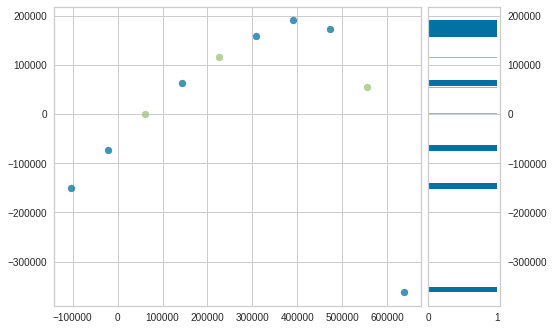

In [16]:
residuos = ResidualsPlot(reg_lin)

residuos.fit(X_train, y_train)
residuos.score(X_test, y_test)

#### 3.1.4) Plot da comparação entre dados e predição

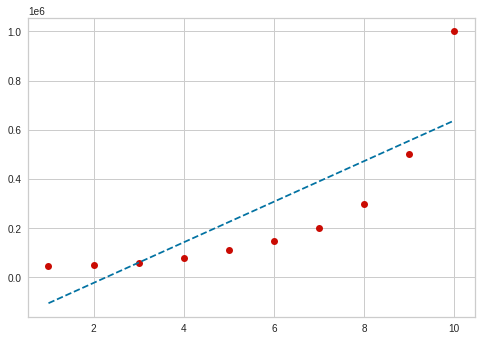

In [25]:
plt.plot(X, y, 'ro', X,reg_lin.predict(X), 'b--')

### 3.2) Regressão quadrática

#### 3.2.1) Treinamento do modelo

#### 3.2.2) Métricas

#### 3.2.3) Gráficos dos resíduos

#### 3.2.4) Plot da comparação entre dados e predição 

### 3.3) Regressão cúbica

#### 3.3.1) Treinamento do modelo

#### 3.3.2) Métricas

#### 3.3.3) Gráfico dos resíduos

#### 3.3.4) Plot de comparação entre dados e predição

### 3.4) Regressão Quártica

#### 3.4.1) Treinamento do modelo

#### 3.4.2) Métricas

#### 3.4.3) Gráfico dos resíduos

#### 3.4.4) Plot da comparação entre dados e predição

## 4) Conclusão